In [487]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage.filters import gaussian_filter
import json
import h5py


# Exploring images and point annotations

In [395]:
img_path = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/images/014.png"
annot_path = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/annotations/annotations.json"

In [396]:
img = mpimg.imread(img_path)
with open(annot_path, 'r') as f:
    points_data = json.load(f)

In [397]:
y_cord1 = points_data["014.png"][0]["y"]
x_cord1 = points_data["014.png"][0]["x"]

y_cord2 = points_data["014.png"][1]["y"]
x_cord2 = points_data["014.png"][1]["x"]

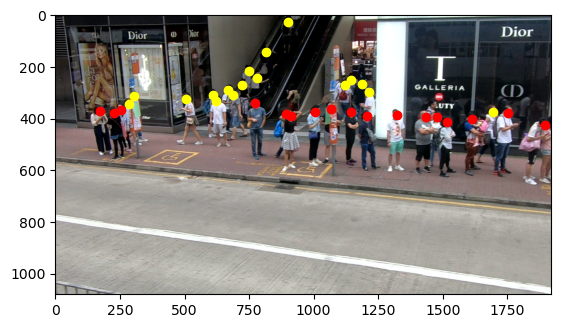

In [398]:
plt.imshow(img)
plt.scatter(x_cord1,y_cord1, color="red")
plt.scatter(x_cord2,y_cord2, color="yellow")

# Generate GT Density maps

In [58]:
def get_density_map_gaussian_new(im, points,sigma):
    im_density = np.zeros(im.shape[0:2])
    h, w = im_density.shape
    for x,y in points:
        im_density[y,x] = 1
        
    return gaussian_filter(im_density,sigma=sigma)

#l = get_density_map_gaussian_new(img,np.array(list(zip(x_cord2,y_cord2))), 16)


In [ ]:
import os
folder_dir = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/images"

for i,image in enumerate(os.listdir(folder_dir)):
    if image.endswith(".png") or image.endswith(".jpg"): 
        if i % 50 == 0:
            print(i)
        img = mpimg.imread(folder_dir + "/" + image)
        im_density = np.zeros((2,)+img.shape[0:2])
        for j in range(2):
            y_cord = points_data[image][j]["y"]
            x_cord = points_data[image][j]["x"]
            im_density[j,:,:] = get_density_map_gaussian_new(img,np.array(list(zip(x_cord,y_cord))), 16)
        with h5py.File("Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/ground-truths/"+image[:-4]+"_fix16.h5", 'w') as f:
            dset = f.create_dataset("density", data=im_density)

            

# Generating dataset statistics

In [82]:
annot_path = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/annotations/test.json"

with open(annot_path, 'r') as f:
    points_data = json.load(f)

In [490]:
#THOMAS LEGER

import os
folder_dir = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/images"
testpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/annotations/test.json"
valpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/annotations/val.json"
trainpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/annotations/train.json"
annotations = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/annotations/annotations.json"

with open(testpoints, 'r') as f:
    test_data = json.load(f)

with open(valpoints, 'r') as f:
    val_data = json.load(f)
with open(trainpoints, 'r') as f:
    train_data = json.load(f)
    
    
h_train=[]
w_train=[]
train_group1=[]
train_group2=[]
h_val=[]
w_val=[]
val_group1=[]
val_group2=[]
h_test=[]
w_test=[]
test_group1=[]
test_group2=[]

with open(annotations, 'r') as f:
    ann = json.load(f)
for i,image in enumerate(os.listdir(folder_dir)):
    if image.endswith(".png") or image.endswith(".jpg"):
        img = mpimg.imread(folder_dir + "/" + image)
        if image in train_data:
            h_train.append(img.shape[0])
            w_train.append(img.shape[1])
            
            train_group1.append(len(ann[image][0]["y"]))
            train_group2.append(len(ann[image][1]["y"]))
            
        elif image in val_data:
            h_val.append(img.shape[0])
            w_val.append(img.shape[1])
            val_group1.append(len(ann[image][0]["y"]))
            val_group2.append(len(ann[image][1]["y"]))
        elif image in test_data:
            h_test.append(img.shape[0])
            w_test.append(img.shape[1])
            test_group1.append(len(ann[image][0]["y"]))
            test_group2.append(len(ann[image][1]["y"]))
        else:
            print("noget er galt")
            
            0/0
            
                #im_density[j,:,:] = get_density_map_gaussian_new(img,np.array(list(zip(x_cord,y_cord))), 16)
           # with h5py.File("Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/ground-truths/"+image[:-4]+"_fix16.h5", 'w') as f:
           #     dset = f.create_dataset("density", data=im_density)

In [491]:
#THOMAS LEGER

import os
folder_dir = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Standing_vs_Sitting/images"
testpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Standing_vs_Sitting/annotations/test.json"
valpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Standing_vs_Sitting/annotations/val.json"
trainpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Standing_vs_Sitting/annotations/train.json"
annotations = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Standing_vs_Sitting/annotations/annotations.json"

with open(testpoints, 'r') as f:
    test_data = json.load(f)

with open(valpoints, 'r') as f:
    val_data = json.load(f)
with open(trainpoints, 'r') as f:
    train_data = json.load(f)
    
    
h_train_ss=[]
w_train_ss=[]
train_group1_ss=[]
train_group2_ss=[]
h_val_ss=[]
w_val_ss=[]
val_group1_ss=[]
val_group2_ss=[]
h_test_ss=[]
w_test_ss=[]
test_group1_ss=[]
test_group2_ss=[]

with open(annotations, 'r') as f:
    ann = json.load(f)
for i,image in enumerate(os.listdir(folder_dir)):
    if image.endswith(".png") or image.endswith(".jpg"):
        img = mpimg.imread(folder_dir + "/" + image)
        if image in train_data:
            h_train_ss.append(img.shape[0])
            w_train_ss.append(img.shape[1])
            
            train_group1_ss.append(len(ann[image][0]["y"]))
            train_group2_ss.append(len(ann[image][1]["y"]))
            
        elif image in val_data:
            h_val_ss.append(img.shape[0])
            w_val_ss.append(img.shape[1])
            val_group1_ss.append(len(ann[image][0]["y"]))
            val_group2_ss.append(len(ann[image][1]["y"]))
        elif image in test_data:
            h_test_ss.append(img.shape[0])
            w_test_ss.append(img.shape[1])
            test_group1_ss.append(len(ann[image][0]["y"]))
            test_group2_ss.append(len(ann[image][1]["y"]))
        else:
            print("noget er galt")
            
            0/0
            
                #im_density[j,:,:] = get_density_map_gaussian_new(img,np.array(list(zip(x_cord,y_cord))), 16)
           # with h5py.File("Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/ground-truths/"+image[:-4]+"_fix16.h5", 'w') as f:
           #     dset = f.create_dataset("density", data=im_density)

In [492]:
#THOMAS LEGER

import os
folder_dir = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Violent_vs_Nonviolent/images"
testpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Violent_vs_Nonviolent/annotations/test.json"
valpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Violent_vs_Nonviolent/annotations/val.json"
trainpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Violent_vs_Nonviolent/annotations/train.json"
annotations = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Violent_vs_Nonviolent/annotations/annotations.json"

with open(testpoints, 'r') as f:
    test_data = json.load(f)

with open(valpoints, 'r') as f:
    val_data = json.load(f)
with open(trainpoints, 'r') as f:
    train_data = json.load(f)
    
    
h_train_v=[]
w_train_v=[]
train_group1_v=[]
train_group2_v=[]
h_val_v=[]
w_val_v=[]
val_group1_v=[]
val_group2_v=[]
h_test_v=[]
w_test_v=[]
test_group1_v=[]
test_group2_v=[]

with open(annotations, 'r') as f:
    ann = json.load(f)
for i,image in enumerate(os.listdir(folder_dir)):
    if image.endswith(".png") or image.endswith(".jpg"):
        img = mpimg.imread(folder_dir + "/" + image)
        if image in train_data:
            h_train_v.append(img.shape[0])
            w_train_v.append(img.shape[1])
            
            train_group1_v.append(len(ann[image][0]["y"]))
            train_group2_v.append(len(ann[image][1]["y"]))
            
        elif image in val_data:
            h_val_v.append(img.shape[0])
            w_val_v.append(img.shape[1])
            val_group1_v.append(len(ann[image][0]["y"]))
            val_group2_v.append(len(ann[image][1]["y"]))
        elif image in test_data:
            h_test_v.append(img.shape[0])
            w_test_v.append(img.shape[1])
            test_group1_v.append(len(ann[image][0]["y"]))
            test_group2_v.append(len(ann[image][1]["y"]))
        else:
            print("noget er galt")
            
            0/0
            
                #im_density[j,:,:] = get_density_map_gaussian_new(img,np.array(list(zip(x_cord,y_cord))), 16)
           # with h5py.File("Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/ground-truths/"+image[:-4]+"_fix16.h5", 'w') as f:
           #     dset = f.create_dataset("density", data=im_density)

In [ ]:
#THOMAS LEGER

import os
folder_dir = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Towards_vs_Away/images"
testpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Towards_vs_Away/annotations/test.json"
valpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Towards_vs_Away/annotations/val.json"
trainpoints = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Towards_vs_Away/annotations/train.json"
annotations = "Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Towards_vs_Away/annotations/annotations.json"

with open(testpoints, 'r') as f:
    test_data = json.load(f)

with open(valpoints, 'r') as f:
    val_data = json.load(f)
with open(trainpoints, 'r') as f:
    train_data = json.load(f)
    
    
h_train_t=[]
w_train_t=[]
train_group1_t=[]
train_group2_t=[]
h_val_t=[]
w_val_t=[]
val_group1_t=[]
val_group2_t=[]
h_test_t=[]
w_test_t=[]
test_group1_t=[]
test_group2_t=[]
q=0
p=0
with open(annotations, 'r') as f:
    ann = json.load(f)
for i,image in enumerate(os.listdir(folder_dir)):
    if image.endswith(".png") or image.endswith(".jpg"):
        img = mpimg.imread(folder_dir + "/" + image)
                
                
        if image in train_data:
            h_train_t.append(img.shape[0])
            w_train_t.append(img.shape[1])
            
            train_group1_t.append(len(ann[image][0]["y"]))
            train_group2_t.append(len(ann[image][1]["y"]))
            
        elif image in val_data:
            h_val_t.append(img.shape[0])
            w_val_t.append(img.shape[1])
            val_group1_t.append(len(ann[image][0]["y"]))
            val_group2_t.append(len(ann[image][1]["y"]))
        elif image in test_data:
            
            h_test_t.append(img.shape[0])
            w_test_t.append(img.shape[1])
            test_group1_t.append(len(ann[image][0]["y"]))
            test_group2_t.append(len(ann[image][1]["y"]))
        else:
            print("noget er galt")
            
            0/0
print(q) 
print(p)
                #im_density[j,:,:] = get_density_map_gaussian_new(img,np.array(list(zip(x_cord,y_cord))), 16)
           # with h5py.File("Fine-Grained-Counting-Dataset/Fine-Grained-Counting-Dataset/Waiting_vs_Notwaiting/ground-truths/"+image[:-4]+"_fix16.h5", 'w') as f:
           #     dset = f.create_dataset("density", data=im_density)

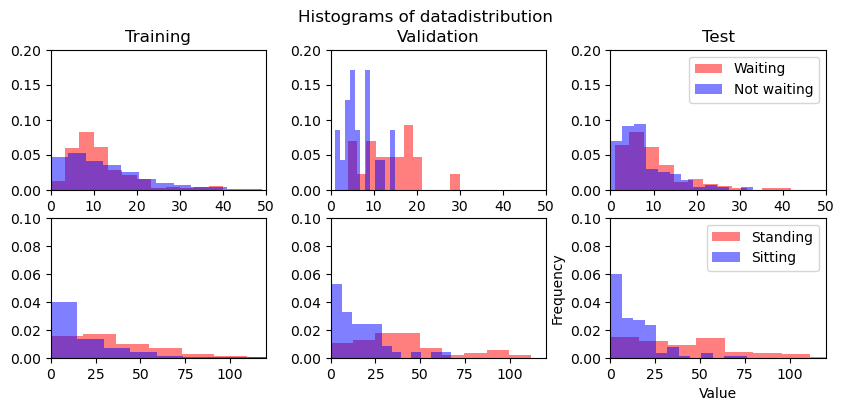

In [494]:
fig, axs = plt.subplots(2, 3, figsize=(10, 4))
axs[0][0].hist(train_group1, bins=12, color='red', alpha=0.5, density=True, label="Waiting")
axs[0][0].hist(train_group2, bins=12, color='blue', alpha=0.5, density=True, label="Not waiting")
axs[0][0].set_xlim(0, 50)
axs[0][0].set_ylim(0, 0.2)
axs[0][1].hist(val_group1, bins=12, color='red', alpha=0.5, density=True, label="Waiting")
axs[0][1].hist(val_group2, bins=12, color='blue', alpha=0.5, density=True)
axs[0][1].set_xlim(0, 50)
axs[0][1].set_ylim(0, 0.2)
axs[0][2].hist(test_group1, bins=12, color='red', alpha=0.5, density=True, label="Waiting")
axs[0][2].hist(test_group2, bins=12, color='blue', alpha=0.5, density=True, label="Not waiting")
axs[0][2].set_xlim(0, 50)
axs[0][2].set_ylim(0, 0.2)
axs[0][2].legend()


axs[1][0].hist(train_group1_ss, bins=12, color='red', alpha=0.5, density=True, label="Waiting")
axs[1][0].hist(train_group2_ss, bins=12, color='blue', alpha=0.5, density=True, label="Not waiting")
axs[1][0].set_xlim(0, 120)
axs[1][0].set_ylim(0, 0.1)
axs[1][1].hist(val_group1_ss, bins=12, color='red', alpha=0.5, density=True, label="Waiting")
axs[1][1].hist(val_group2_ss, bins=12, color='blue', alpha=0.5, density=True)
axs[1][1].set_xlim(0, 120)
axs[1][1].set_ylim(0, 0.1)
axs[1][2].hist(test_group1_ss, bins=12, color='red', alpha=0.5, density=True, label="Standing")
axs[1][2].hist(test_group2_ss, bins=12, color='blue', alpha=0.5, density=True, label="Sitting")
axs[1][2].set_xlim(0, 120)
axs[1][2].set_ylim(0, 0.1)
axs[1][2].legend()



# add titles and labels
axs[0][0].set_title('Training')
axs[0][1].set_title('Validation')
axs[0][2].set_title('Test')
fig.suptitle('Histograms of datadistribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# show the plot
plt.show()

In [354]:
np.sum(test_group1_ss+train_group1_ss+val_group1_ss)

19443

In [353]:
np.sum(test_group2_ss+train_group2_ss+val_group2_ss)

8753

In [475]:
test_group_ss_array1=np.array(test_group1_ss)
test_group_ss_array2=np.array(test_group2_ss)

In [447]:
len(h_test_t)

800

In [485]:
train_group_ss_array=np.array(train_group1)+np.array(train_group2)
val_group_ss_array=np.array(val_group1)+np.array(val_group2)
test_group_ss_array=np.array(test_group1)+np.array(test_group2)

In [ ]:
print(len(train_group_ss_array))
print(len(val_group_ss_array))
print(len(test_group_ss_array))
print("min")
print(np.min(train_group_ss_array))
print(np.min(val_group_ss_array))
print(np.min(test_group_ss_array))
print("median")
print(np.median(train_group_ss_array))
print(np.median(val_group_ss_array))
print(np.median(test_group_ss_array))
print("max")
print(np.max(train_group_ss_array))
print(np.max(val_group_ss_array))
print(np.max(test_group_ss_array))
print("total")
print(np.sum(train_group_ss_array))
print(np.sum(val_group_ss_array))
print(np.sum(test_group_ss_array))


print("%" , np.sum(np.array(train_group1))/np.sum(train_group_ss_array), 1-np.sum(np.array(train_group1))/np.sum(train_group_ss_array))
print("%" , np.sum(np.array(val_group1))/np.sum(val_group_ss_array), 1-np.sum(np.array(val_group1))/np.sum(val_group_ss_array))
print("%" , np.sum(np.array(test_group1))/np.sum(test_group_ss_array), 1-np.sum(np.array(test_group1))/np.sum(test_group_ss_array))


print("res", np.mean(h_train),np.mean(w_train) )
print("res", np.mean(h_val),np.mean(w_val) )
print("res", np.mean(h_test),np.mean(w_test) )


/tmp/ipykernel_3081189/1428624053.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][0].set_xticklabels(['', ''])
/tmp/ipykernel_3081189/1428624053.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][1].set_xticklabels(['', ''])
/tmp/ipykernel_3081189/1428624053.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][1].set_yticklabels(['', ''])
/tmp/ipykernel_3081189/1428624053.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][2].set_xticklabels(['', ''])
/tmp/ipykernel_3081189/1428624053.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0][2].set_yticklabels(['', ''])
/tmp/ipykernel_3081189/1428624053.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1][0].set_xticklabels(['', ''])
/tmp/ipykernel_3081189/1428624053.py:75: UserWarning: FixedFormatter should o

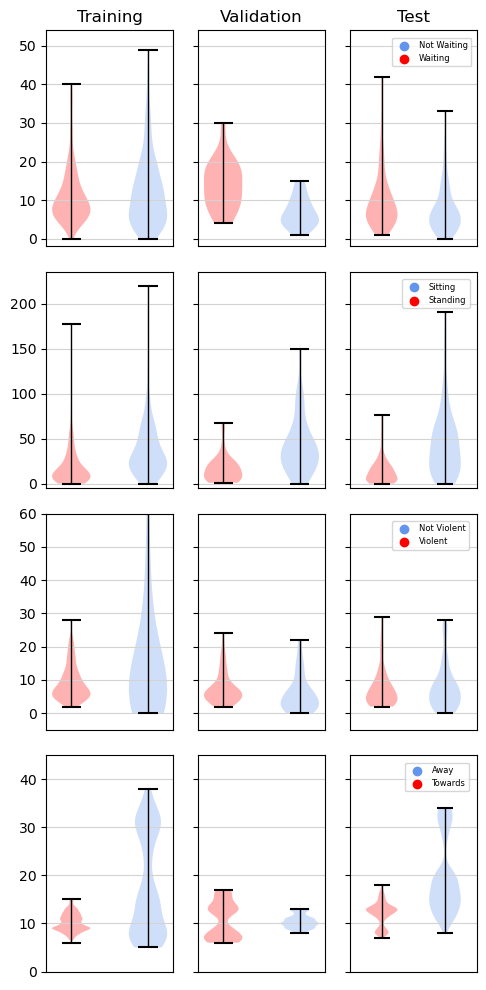

In [495]:
fig, axs = plt.subplots(4, 3, figsize=(5, 10))
colors = ['red', 'cornflowerblue']
parts=axs[0][0].violinplot([train_group1,train_group2], showmeans=False, showmedians=False, showextrema=True)
axs[0][0].set_xticklabels(['', ''])
axs[0][0].set_xticks([])
axs[0][0].set_ylim(-2, 54)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')

parts=axs[0][1].violinplot([val_group1,val_group2], showmeans=False, showmedians=False, showextrema=True)
axs[0][1].set_xticklabels(['', ''])
axs[0][1].set_xticks([])
axs[0][1].set_yticklabels(['', ''])
axs[0][1].set_yticks([0, 10,20,30,40,50])
axs[0][1].set_ylim(-2, 54)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
parts=axs[0][2].violinplot([test_group1,test_group2], showmeans=False, showmedians=False, showextrema=True)
axs[0][2].set_xticklabels(['', ''])
axs[0][2].set_xticks([])
axs[0][2].set_yticklabels(['', ''])
axs[0][2].set_yticks([0, 10,20,30,40,50])
axs[0][2].set_ylim(-2, 54)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
label_dict = {'red': 'Waiting', 'cornflowerblue':"Not Waiting"}


# plot the data points with labels based on colors
for color in np.unique(colors):
    mask = colors == color
    axs[0][2].scatter(x[mask], y[mask], c=color, label=label_dict[color])

# set the legend and title

# create a separate axis object for the legend
legend_ax = fig.add_axes([0.7, 0.7, 0.2, 0.2])
legend_ax.axis('off')
legend_font = {'size': 6}
# plot the legend on the separate axis object
axs[0][2].legend(loc='center left', bbox_to_anchor=(0.3, 0.9), prop=legend_font)
#legend_ax.legend(*axs[0][2].get_legend_handles_labels(), loc='center')
axs[0][2].set_ylim(-2, 54)

axs[0][2].set_xlim(0.5,2.5)

##############################################################################################################


colors = ['red', 'cornflowerblue']
parts=axs[1][0].violinplot([train_group2_ss,train_group1_ss], showmeans=False, showmedians=False, showextrema=True)
axs[1][0].set_xticklabels(['', ''])
axs[1][0].set_xticks([])
axs[1][0].set_ylim(-5, 235)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')

parts=axs[1][1].violinplot([val_group2_ss,val_group1_ss], showmeans=False, showmedians=False, showextrema=True)
axs[1][1].set_xticklabels(['', ''])
axs[1][1].set_xticks([])
axs[1][1].set_yticklabels(['', ''])
axs[1][1].set_yticks([0, 50,100,150,200,250])
axs[1][1].set_ylim(-5, 235)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
parts=axs[1][2].violinplot([test_group2_ss,test_group1_ss], showmeans=False, showmedians=False, showextrema=True)
axs[1][2].set_xticklabels(['', ''])
axs[1][2].set_xticks([])
axs[1][2].set_yticklabels(['', ''])
axs[1][2].set_yticks([0, 50,100,150,200,250])
axs[1][2].set_ylim(-5, 235)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
label_dict = {'red': 'Standing', 'cornflowerblue':"Sitting"}


# plot the data points with labels based on colors
for color in np.unique(colors):
    mask = colors == color
    axs[1][2].scatter(x[mask], y[mask], c=color, label=label_dict[color])

# set the legend and title

# create a separate axis object for the legend
legend_ax = fig.add_axes([0.7, 0.7, 0.2, 0.2])
legend_ax.axis('off')

# plot the legend on the separate axis object
axs[1][2].legend(loc='center left', bbox_to_anchor=(0.38, 0.9), prop=legend_font)
#legend_ax.legend(*axs[0][2].get_legend_handles_labels(), loc='center')
axs[1][2].set_ylim(-5, 235)

axs[1][2].set_xlim(0.5,2.5)

################################################################################################################################################


colors = ['red', 'cornflowerblue']
parts=axs[2][0].violinplot([train_group1_v,train_group2_v], showmeans=False, showmedians=False, showextrema=True)
axs[2][0].set_xticklabels(['', ''])
axs[2][0].set_xticks([])
axs[2][0].set_ylim(-5, 60)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')

parts=axs[2][1].violinplot([val_group1_v,val_group2_v], showmeans=False, showmedians=False, showextrema=True)
axs[2][1].set_xticklabels(['', ''])
axs[2][1].set_xticks([])
axs[2][1].set_yticklabels(['', ''])
axs[2][1].set_yticks([0, 10,20,30,40,50])
axs[2][1].set_ylim(-5, 60)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
parts=axs[2][2].violinplot([test_group1_v,test_group2_v], showmeans=False, showmedians=False, showextrema=True)
axs[2][2].set_xticklabels(['', ''])
axs[2][2].set_xticks([])
axs[2][2].set_yticklabels(['', ''])
axs[2][2].set_yticks([])
axs[2][2].set_ylim(-5, 60)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
label_dict = {'red': 'Violent', 'cornflowerblue':"Not Violent"}


# plot the data points with labels based on colors
for color in np.unique(colors):
    mask = colors == color
    axs[2][2].scatter(x[mask], y[mask], c=color, label=label_dict[color])

# set the legend and title

# create a separate axis object for the legend
legend_ax = fig.add_axes([0.7, 0.7, 0.2, 0.2])
legend_ax.axis('off')

# plot the legend on the separate axis object
axs[2][2].legend(loc='center left', bbox_to_anchor=(0.3, 0.9), prop=legend_font)
#legend_ax.legend(*axs[0][2].get_legend_handles_labels(), loc='center')


axs[2][2].set_xlim(0.5,2.5)
axs[2][2].set_yticks([0, 10,20,30,40,50])
axs[2][2].set_ylim(-5, 60)
#############################################################################################################################################



colors = ['red', 'cornflowerblue']
parts=axs[3][0].violinplot([train_group1_t,train_group2_t], showmeans=False, showmedians=False, showextrema=True)
axs[3][0].set_xticklabels(['', ''])
axs[3][0].set_xticks([])
axs[3][0].set_ylim(0, 45)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')

parts=axs[3][1].violinplot([val_group1_t,val_group2_t], showmeans=False, showmedians=False, showextrema=True)
axs[3][1].set_xticks([])
axs[3][1].tick_params(labelsize=1)
axs[3][1].set_yticklabels(['', ''])
axs[3][1].set_yticks([0, 10,20,30,40,50])
axs[3][1].set_ylim(0, 45)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
parts=axs[3][2].violinplot([test_group1_t,test_group2_t], showmeans=False, showmedians=False, showextrema=True)
axs[3][2].set_xticklabels(['', ''])
axs[3][2].set_xticks([])
axs[3][2].tick_params(labelsize=1)
axs[3][2].set_yticklabels(['', ''])
axs[3][2].set_yticks([0, 10,20,30,40,50])
axs[3][2].set_ylim(0, 45)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
parts['cbars'].set_edgecolor("black")
parts['cbars'].set_linewidth(1)
parts['cmaxes'].set_edgecolor('black')
parts['cmins'].set_edgecolor('black')
label_dict = {'red': 'Towards', 'cornflowerblue':"Away"}


# plot the data points with labels based on colors
for color in np.unique(colors):
    mask = colors == color
    axs[3][2].scatter(x[mask], y[mask], c=color, label=label_dict[color])

# set the legend and title

# create a separate axis object for the legend
legend_ax = fig.add_axes([0.7, 0.7, 0.2, 0.2])
legend_ax.axis('off')

# plot the legend on the separate axis object
axs[3][2].legend(loc='center left', bbox_to_anchor=(0.40, 0.9), prop=legend_font)
#legend_ax.legend(*axs[0][2].get_legend_handles_labels(), loc='center')
axs[3][2].set_ylim(0,45)

axs[3][2].set_xlim(0.5,2.5)


axs[0,0].grid(True, color='lightgray')
axs[0,1].grid(True, color='lightgray')
axs[0][2].grid(True, color='lightgray')
axs[1][0].grid(True, color='lightgray')
axs[1][1].grid(True, color='lightgray')
axs[1][2].grid(True, color='lightgray')
axs[2][0].grid(True, color='lightgray')
axs[2][1].grid(True, color='lightgray')
axs[2][2].grid(True, color='lightgray')
axs[3][0].grid(True, color='lightgray')
axs[3][1].grid(True, color='lightgray')
axs[3][2].grid(True, color='lightgray')









##############################################################################################################################################
# add titles and labels
axs[0][0].set_title('Training')
axs[0][1].set_title('Validation')
axs[0][2].set_title('Test')




plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)
plt.savefig('datadist.svg', format='svg')
# show the plot
plt.show()